# Using R In Jupyter Notebook

These are the steps I used to enable R within jupyter notebooks

Install [Anaconda](https://anaconda.org/).  

I used 3.6

## In the command line  

If you want to use a particular conda environment then activate it

> \> **activate root**

Install the required R packages into conda

> \> **conda install -c r r-essentials**

Install rpy2 (An R <-> Python interface)

> \> **conda install -c r rpy2**

Open a Jupyter notebook and load rpy2 using magics

In [1]:
# load rpy magic
%load_ext rpy2.ipython

## Testing with ggplot

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# create df
df = pd.DataFrame({"x": np.random.normal(loc=40, scale=20, size=26),
                   "y": np.random.normal(loc=60, scale=40, size=26),
                   "z": np.random.binomial(1, 0.5, 26)},
                  index = list('abcdefghijklmnopqrstuvwxyz'))

In [4]:
# Transfer df variable to R with same name
%R -i df

In [5]:
%%R
require(ggplot2)
require(dplyr)

In [6]:
# Have a look at df in R
%R df %>% head()

,x,y,z
a,57.421875,77.793821,0
b,29.193785,82.506367,0
c,42.145996,76.992576,0
d,15.464528,98.497208,1
e,77.505259,58.192243,1
f,46.955262,71.296951,0


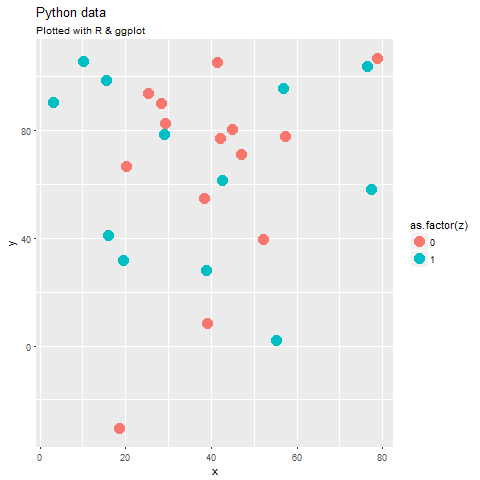

In [7]:
%%R
dd <-
    ggplot(df, aes(x=x, y=y, colour=as.factor(z))) +
        geom_point(size=5) +
        ggtitle("Python data", subtitle = "Plotted with R & ggplot")
print(dd)

In [8]:
%%R
# copy df into df_copy
df_copy <- df

In [9]:
# transfer copied df back to python
%R -o df_copy

In [10]:
# View python copy
df_copy.head()

,x,y,z
a,57.421875,77.793821,0
b,29.193785,82.506367,0
c,42.145996,76.992576,0
d,15.464528,98.497208,1
e,77.505259,58.192243,1


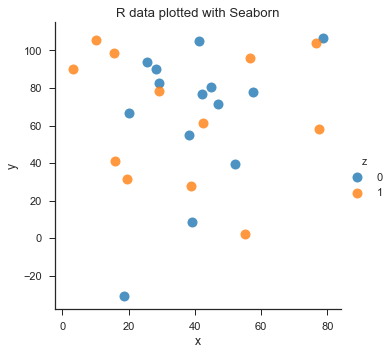

In [11]:
# graph with seaborn
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('x',
           'y',
           data=df_copy,
           fit_reg=False,
           hue="z",
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}      # S marker size
          )
plt.title("R data plotted with Seaborn")

## Summary

We've installed r libraries for python  

Brought R into jupyter notebook with magics  

Created some data with python  

Passed it to R and graphed it with ggplot  

Copied the data and passed it back to python  

And finally graphed the data using seaborn.


